# Creating A Model of Diabetes Dataset
Importing necessary libraries

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pickle
%matplotlib inline

# Reading the Diabetes Dataset

In [142]:
df = pd.read_csv('diabete.csv')

In [143]:
print(df.shape)

(768, 9)


In [144]:
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [145]:
df.tail()

,preg,plas,pres,skin,insu,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive
767,1,93,70,31,0,30.4,0.315,23,tested_negative


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [147]:
df["age"].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

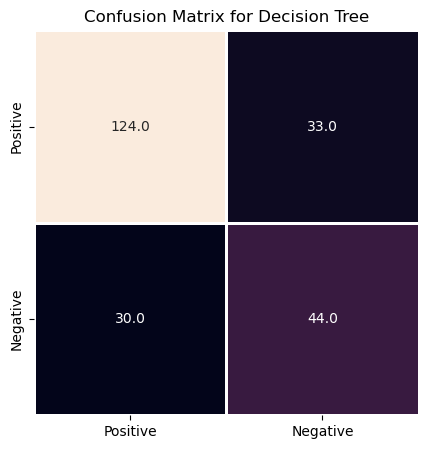

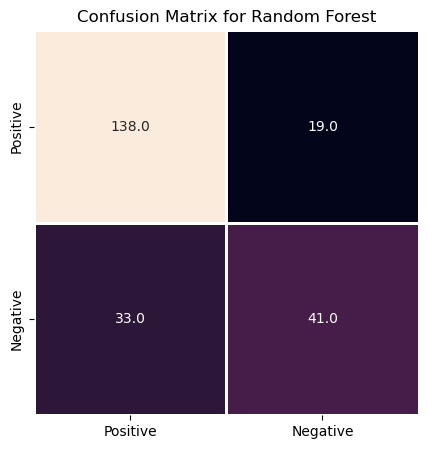

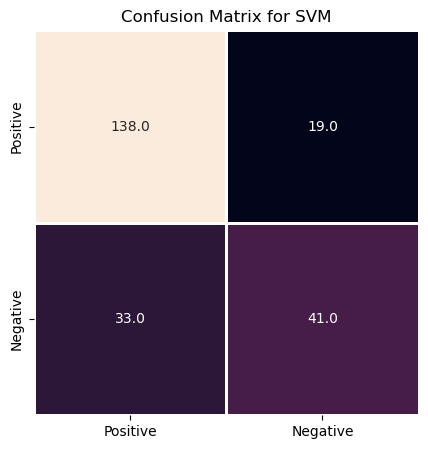

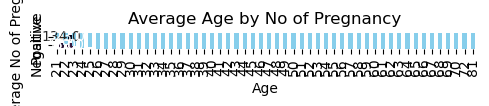

In [148]:
# Group and calculate mean grade per gender
grouped = df.groupby("age")["preg"].mean()

# Plot
grouped.plot(kind='bar', color='skyblue')
plt.title("Average Age by No of Pregnancy")
plt.ylabel("Average No of Pregnancy")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

In [149]:
grouped.describe()

count    52.000000
mean      5.320897
std       2.243007
min       1.079365
25%       3.717262
50%       5.450000
75%       7.169643
max       9.000000
Name: preg, dtype: float64

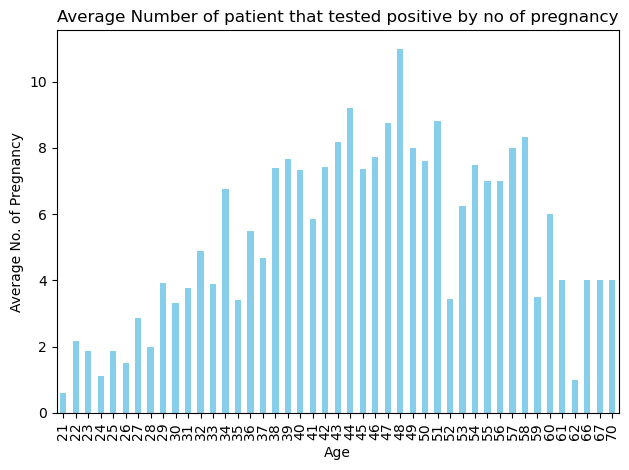

In [150]:
#Checking for student who find the course difficulty
# Filter the DataFrame
filtered_df = df[
    (df["class"] == "tested_positive") 
]

# Group and calculate mean grade per gender
grouped = filtered_df.groupby("age")["preg"].mean()

# Plot
grouped.plot(kind='bar', color='skyblue')
plt.title("Average Number of patient that tested positive by no of pregnancy")
plt.ylabel("Average No. of Pregnancy")
plt.xlabel("Age")
plt.tight_layout()
plt.show()

In [151]:
grouped.describe()

count    45.000000
mean      5.343001
std       2.623363
min       0.600000
25%       3.428571
50%       5.500000
75%       7.500000
max      11.000000
Name: preg, dtype: float64

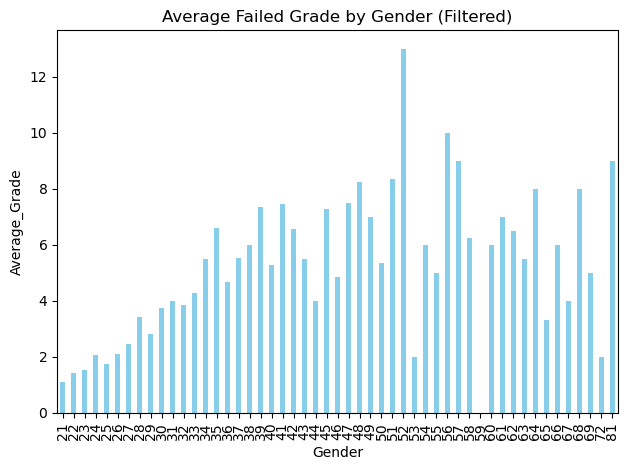

In [152]:
#Checking for student who find the course difficulty
# Filter the DataFrame
filtered_df = df[
    (df["class"] != "tested_positive") 
]

# Group and calculate mean grade per gender
grouped = filtered_df.groupby("age")["preg"].mean()

# Plot
grouped.plot(kind='bar', color='skyblue')
plt.title("Average Failed Grade by Gender (Filtered)")
plt.ylabel("Average_Grade")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()

In [153]:
grouped.describe()

count    51.000000
mean      5.276618
std       2.589040
min       0.000000
25%       3.586667
50%       5.500000
75%       7.000000
max      13.000000
Name: preg, dtype: float64

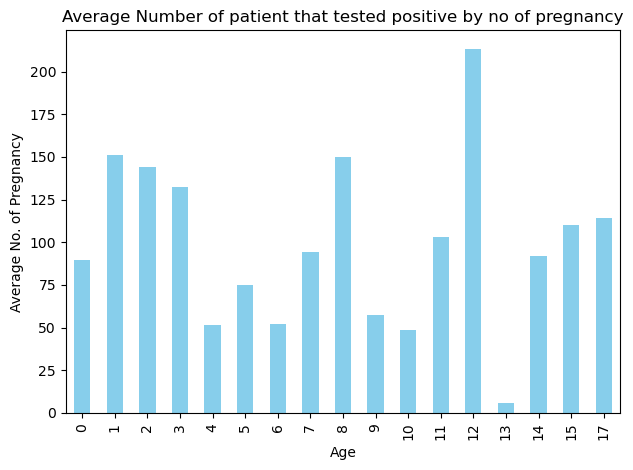

In [154]:
#Checking for student who find the course difficulty
# Filter the DataFrame
filtered_df = df[
    (df["class"] == "tested_positive") 
]

# Group and calculate mean grade per gender
grouped = filtered_df.groupby("preg")["insu"].mean()

# Plot
grouped.plot(kind='bar', color='skyblue')
plt.title("Average Number of patient that tested positive by no of pregnancy")
plt.ylabel("Average No. of Pregnancy")
plt.xlabel("Age")
plt.tight_layout()
plt.show()



In [155]:
grouped.describe()

count     17.000000
mean      99.093991
std       50.053816
min        5.800000
25%       57.555556
50%       94.040000
75%      132.666667
max      213.500000
Name: insu, dtype: float64

# Train Test Split
Let's split up the data into training set and test set

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X = df.drop('class',axis = 1)
y = df['class']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

# Decision Trees
We'll start just by training a single decision tree

In [161]:
from sklearn.tree import DecisionTreeClassifier

In [162]:
dtree = DecisionTreeClassifier()

In [163]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Prediction and Evaluation for Decision Trees
Let's evaluate our decision tree

In [165]:
predTree = dtree.predict(X_test)

In [166]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [167]:
print(classification_report(y_test,predTree))

                 precision    recall  f1-score   support

tested_negative       0.81      0.81      0.81       157
tested_positive       0.60      0.61      0.60        74

       accuracy                           0.74       231
      macro avg       0.71      0.71      0.71       231
   weighted avg       0.75      0.74      0.75       231



In [168]:
print(confusion_matrix(y_test,predTree))

[[127  30]
 [ 29  45]]


In [169]:
print(accuracy_score(y_test,predTree)*100)

74.45887445887446


In [170]:
a = pd.DataFrame(confusion_matrix(y_test,predTree),index='Positive Negative'.split(), columns='Positive Negative'.split())

In [171]:
plt.figure(figsize = (5,5))

<Figure size 500x500 with 0 Axes>

In [172]:
ax = sns.heatmap(a,annot=True,fmt='.1f',square=1,linewidth=1.,cbar=False)
plt.title('Confusion Matrix for Decision Tree')

Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

# Random Forest
We'll start training the model with Random forest Machine learning algorithm

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
rfc = RandomForestClassifier(n_estimators = 100)

In [176]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [177]:
rfc_pred = rfc.predict(X_test)

In [178]:
rfc.predict([[2,300,0,0,45.2,2.1,55,45]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array(['tested_negative'], dtype=object)

In [179]:
df_pred_train = pd.DataFrame(
    {
        "y_test": y_train.iloc[:200],
        "y_pred_wfv": rfc_pred[:200]
    },
    index = y_train.index[:200]
)

fig = px.line(df_pred_train, labels={"value":"Test Result"})
fig.show()

In [180]:
rfc.predict([[0,60,4,5,45.2,2.1,35,28]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array(['tested_negative'], dtype=object)

# Prediction and Evaluation for Random Forest
Let's evaluate our random forest 

In [182]:
print(classification_report(y_test,rfc_pred))

                 precision    recall  f1-score   support

tested_negative       0.80      0.89      0.84       157
tested_positive       0.69      0.54      0.61        74

       accuracy                           0.77       231
      macro avg       0.75      0.71      0.72       231
   weighted avg       0.77      0.77      0.77       231



In [183]:
print(accuracy_score(y_test,rfc_pred)*100)

77.48917748917748


In [184]:
print(confusion_matrix(y_test,rfc_pred))

[[139  18]
 [ 34  40]]


In [185]:
a = pd.DataFrame(confusion_matrix(y_test,rfc_pred),index='Positive Negative'.split(), columns='Positive Negative'.split())

In [186]:
plt.figure(figsize = (5,5))

<Figure size 500x500 with 0 Axes>

In [187]:
ax = sns.heatmap(a,annot=True,fmt='.1f',square=1,linewidth=1.,cbar=False)
plt.title('Confusion Matrix for Random Forest')

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

In [188]:
#pkl_filename = 'random_model.pkl'
#pickle.dump(rfc, open(pkl_filename, 'wb'))

In [280]:
rfc.predict([[2,3,4,5,45.2,2.1,35,6]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



array(['tested_negative'], dtype=object)

# SVM
Let's start training models with SVM ML techniques

In [190]:
from sklearn import svm

In [191]:
svm_classifier = svm.SVC()

In [192]:
svm_classifier.fit(X_train,y_train)

SVC()

In [193]:
svm_pred = svm_classifier.predict(X_test)

# Prediction and Evaluation for SVM
Let's evaluate our SVM 

In [195]:
print(classification_report(y_test,svm_pred))

                 precision    recall  f1-score   support

tested_negative       0.77      0.90      0.83       157
tested_positive       0.68      0.43      0.53        74

       accuracy                           0.75       231
      macro avg       0.73      0.67      0.68       231
   weighted avg       0.74      0.75      0.74       231



In [196]:
print(accuracy_score(y_test,svm_pred)*100)

75.32467532467533


In [197]:
print(confusion_matrix(y_test,svm_pred))

[[142  15]
 [ 42  32]]


In [198]:
a = pd.DataFrame(confusion_matrix(y_test,rfc_pred),index='Positive Negative'.split(), columns='Positive Negative'.split())
plt.figure(figsize = (5,5))
ax = sns.heatmap(a,annot=True,fmt='.1f',square=1,linewidth=1.,cbar=False)
plt.title('Confusion Matrix for SVM')

Text(0.5, 1.0, 'Confusion Matrix for SVM')

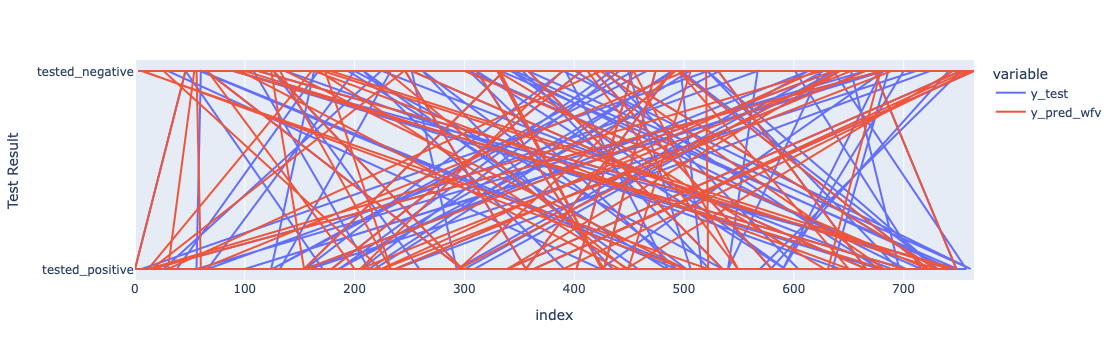

In [199]:
df_pred_train = pd.DataFrame(
    {
        "y_test": y_train.iloc[:200],
        "y_pred_wfv": svm_pred[:200]
    },
    index = y_train.index[:200]
)

fig = px.line(df_pred_train, labels={"value":"Test Result"})
fig.show()

# KNN
Let's start training models with KNN ML techniques

In [201]:
from sklearn.neighbors import KNeighborsClassifier

In [202]:
KNN = KNeighborsClassifier(n_neighbors=5)

In [203]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [204]:
KNN_pred = KNN.predict(X_test)

# Prediction and Evaluation for KNN
Let's evaluate our KNN classification_report, confusion_matrix, accuracy_score

In [206]:
print(classification_report(y_test,KNN_pred))

                 precision    recall  f1-score   support

tested_negative       0.79      0.85      0.82       157
tested_positive       0.63      0.53      0.57        74

       accuracy                           0.75       231
      macro avg       0.71      0.69      0.70       231
   weighted avg       0.74      0.75      0.74       231



In [207]:
print(accuracy_score(y_test,KNN_pred)*100)

74.89177489177489


In [208]:
print(confusion_matrix(y_test,KNN_pred))

[[134  23]
 [ 35  39]]


In [209]:
a = pd.DataFrame(confusion_matrix(y_test,KNN_pred),index='Positive Negative'.split(), columns='Positive Negative'.split())
plt.figure(figsize = (5,5))
ax = sns.heatmap(a,annot=True,fmt='.1f',square=1,linewidth=1.,cbar=False)
plt.title('Confusion Matrix for KNN')

Text(0.5, 1.0, 'Confusion Matrix for KNN')

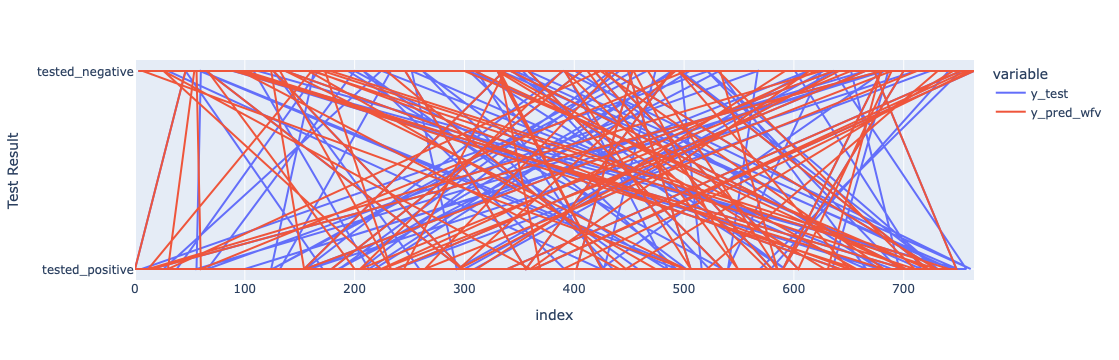

In [210]:
df_pred_train = pd.DataFrame(
    {
        "y_test": y_train.iloc[:200],
        "y_pred_wfv": KNN_pred[:200]
    },
    index = y_train.index[:200]
)

fig = px.line(df_pred_train, labels={"value":"Test Result"})
fig.show()

In [211]:
import joblib

# Save the model
joblib.dump(rfc, 'rfcModel.pkl')
joblib.dump(svm_classifier, 'svmModel.pkl')
joblib.dump(KNN, 'knnModel.pkl')

['knnModel.pkl']